In [4]:
# imports
%matplotlib inline
from skimage import io, data, color
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

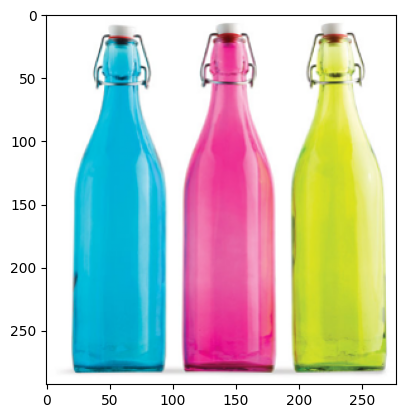

In [5]:
bottles = io.imread('../images/bottles.png')/255
plt.imshow(bottles)
plt.show()


In [6]:
def color_detection(image):    
    image_R, image_B, image_G= image[:,:,0], image[:,:,1], image[:,:,2]
    mask = (image_R > 0.3) & (image_B > 0.4) & (image_G > 0.2)

    positive_subspace = np.zeros_like(image)
    for c in range(3):
        positive_subspace[:,:,c][mask] = image[:,:,c][mask]
    positive_subspace = color.rgb2gray(positive_subspace)
    return positive_subspace



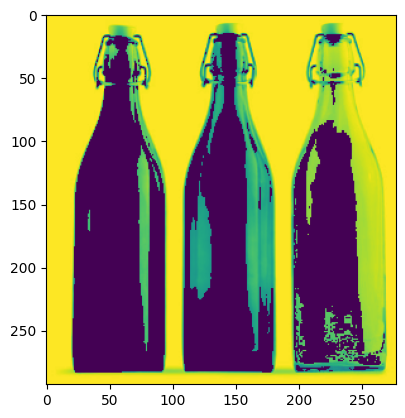

In [7]:
positive_subspace = color_detection(bottles)
plt.imshow(positive_subspace)
plt.show()

In [12]:
from skimage import morphology
def erosion_dilation(image):
    selem = morphology.footprint_rectangle((3,3))
    eroded = morphology.erosion(image, selem)
    image = morphology.dilation(eroded, selem)
    return image


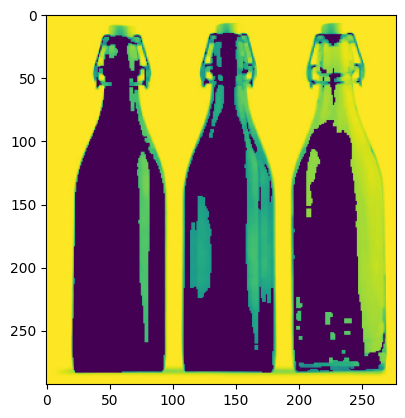

In [13]:
ero_dil = erosion_dilation(positive_subspace)
plt.imshow(ero_dil)
plt.show()

In [14]:
class UnionFind:
    def __init__(self):
        self.parent = {}

    def find(self, x):
        # Path compression
        if self.parent.get(x, x) != x:
            self.parent[x] = self.find(self.parent[x])
        return self.parent.get(x, x)

    def union(self, x, y):
        root_x = self.find(x)
        root_y = self.find(y)
        if root_x != root_y:
            self.parent[root_y] = root_x


def two_pass_algo(binary_image):
    labels = np.zeros_like(binary_image)
    label = 1
    uf = UnionFind()

    for i in range(binary_image.shape[0]):
        for j in range(binary_image.shape[1]):
            if binary_image[i,j]:
                neighbors = []
                if i > 0 and labels[i-1, j] > 0:
                    neighbors.append(labels[i-1, j])
                if j > 0 and labels[i, j-1] > 0:
                    neighbors.append(labels[i, j-1])
                if not neighbors:
                    labels[i, j] = label
                    label += 1
                else:
                    min_label = min(neighbors)
                    labels[i, j] = min_label
                    for n in neighbors:
                        uf.union(min_label, n)

    for r in range(labels.shape[0]):
        for c in range(labels.shape[1]):
            if labels[r, c] > 0:
                labels[r, c] = uf.find(labels[r, c])

    return labels


[[93. 93. 93. ... 93. 93. 93.]
 [93. 93. 93. ... 93. 93. 93.]
 [93. 93. 93. ... 93. 93. 93.]
 ...
 [93. 93. 93. ... 93. 93. 93.]
 [93. 93. 93. ... 93. 93. 93.]
 [93. 93. 93. ... 93. 93. 93.]]


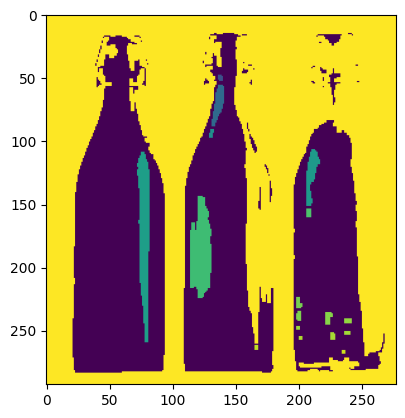

In [15]:

#binary_image = np.all(positive_subspace > 0, axis=-1)
two_pass = two_pass_algo(ero_dil)
print(two_pass)
plt.imshow(two_pass)
plt.show()